## EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

sns.set_theme(style='darkgrid')
sns.set(font_scale=1.2, palette='Set1')

import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('flight.csv')
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
22452,52288,11/26/2012,11/26/2012,Female,4,shenzhen,guangdong,CN,26.0,3/31/2014,...,8606.0,18874,3/10/2014,22,47.000000,133,0,0.574262,9231,0
37284,24871,8/15/2012,8/24/2012,Male,4,guangzhou,guangdong,CN,52.0,3/31/2014,...,0.0,5302,8/31/2012,579,7.000000,7,0,1.000000,5302,0
51678,18243,12/20/2010,9/15/2012,Female,4,dalianshi,liaoningsheng,CN,36.0,3/31/2014,...,0.0,4337,11/24/2012,494,23.333333,44,0,0.575375,5094,18
52625,24739,9/19/2012,9/19/2012,Male,4,shanghai,shanghai,CN,33.0,3/31/2014,...,732.0,5648,12/28/2013,95,155.000000,308,0,0.418782,858,0
48888,50830,9/6/2012,9/6/2012,Male,4,beijing,beijing,CN,38.0,3/31/2014,...,1776.0,3448,3/18/2014,14,186.333333,240,0,0.851175,2597,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [7]:
#membagi data dalam numerik dan kategorik
num = df.select_dtypes('number').columns
kat = df.select_dtypes('object').columns

In [12]:
# menampilkan jumlah null
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [14]:
# persentase missing value 
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
MEMBER_NO,MEMBER_NO,0.000000
FFP_DATE,FFP_DATE,0.000000
FIRST_FLIGHT_DATE,FIRST_FLIGHT_DATE,0.000000
GENDER,GENDER,0.004763
FFP_TIER,FFP_TIER,0.000000
WORK_CITY,WORK_CITY,3.602273
WORK_PROVINCE,WORK_PROVINCE,5.156538
WORK_COUNTRY,WORK_COUNTRY,0.041278
AGE,AGE,0.666794
LOAD_TIME,LOAD_TIME,0.000000


Handling missing value dilakukan dengan Imputation

In [16]:
#data numerik
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean(), inplace=True)

In [18]:
# data kategorikal 
df['GENDER']=df['GENDER'].fillna(df['GENDER'].mode()[0])
df['WORK_CITY']=df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0])
df['WORK_PROVINCE']=df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0])
df['WORK_COUNTRY']=df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0])

In [19]:
## cek missing value kembali
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [13]:
# menampilkan apakah dataset terdapat duplikasi data atau tidak
df.duplicated().any()

False

In [9]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [10]:
df[kat].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [11]:
#menampilkan proporsi jumlah value pada masing2 kolom kategorik (sudah scaling 100%)
for i in kat:
        print(round(df[i].value_counts(normalize=True).multiply(100),0),'\n')

1/13/2011     0.0
1/1/2013      0.0
3/1/2013      0.0
11/17/2010    0.0
1/14/2011     0.0
             ... 
10/4/2005     0.0
5/18/2009     0.0
11/29/2004    0.0
11/7/2004     0.0
5/19/2009     0.0
Name: FFP_DATE, Length: 3068, dtype: float64 

2/16/2013    0.0
9/30/2012    0.0
2/15/2013    0.0
9/9/2005     0.0
4/21/2012    0.0
            ... 
3/2/2005     0.0
4/12/2009    0.0
2/20/2005    0.0
1/27/2005    0.0
12/7/2004    0.0
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: float64 

Male      76.0
Female    24.0
Name: GENDER, dtype: float64 

guangzhou    15.0
beijing      13.0
shanghai      8.0
shenzhen      6.0
dalian        3.0
             ... 
KASUGAI       0.0
hainan        0.0
xinxishi      0.0
KA            0.0
lingshui      0.0
Name: WORK_CITY, Length: 3234, dtype: float64 

guangdong        29.0
beijing          13.0
shanghai          8.0
liaoning          7.0
xinjiang          4.0
                 ... 
YAMAGUCHI-KEN     0.0
AICHIKEN          0.0
SOUTU HOLLAND     0.0
xinxixi

### __OUTLIERS__

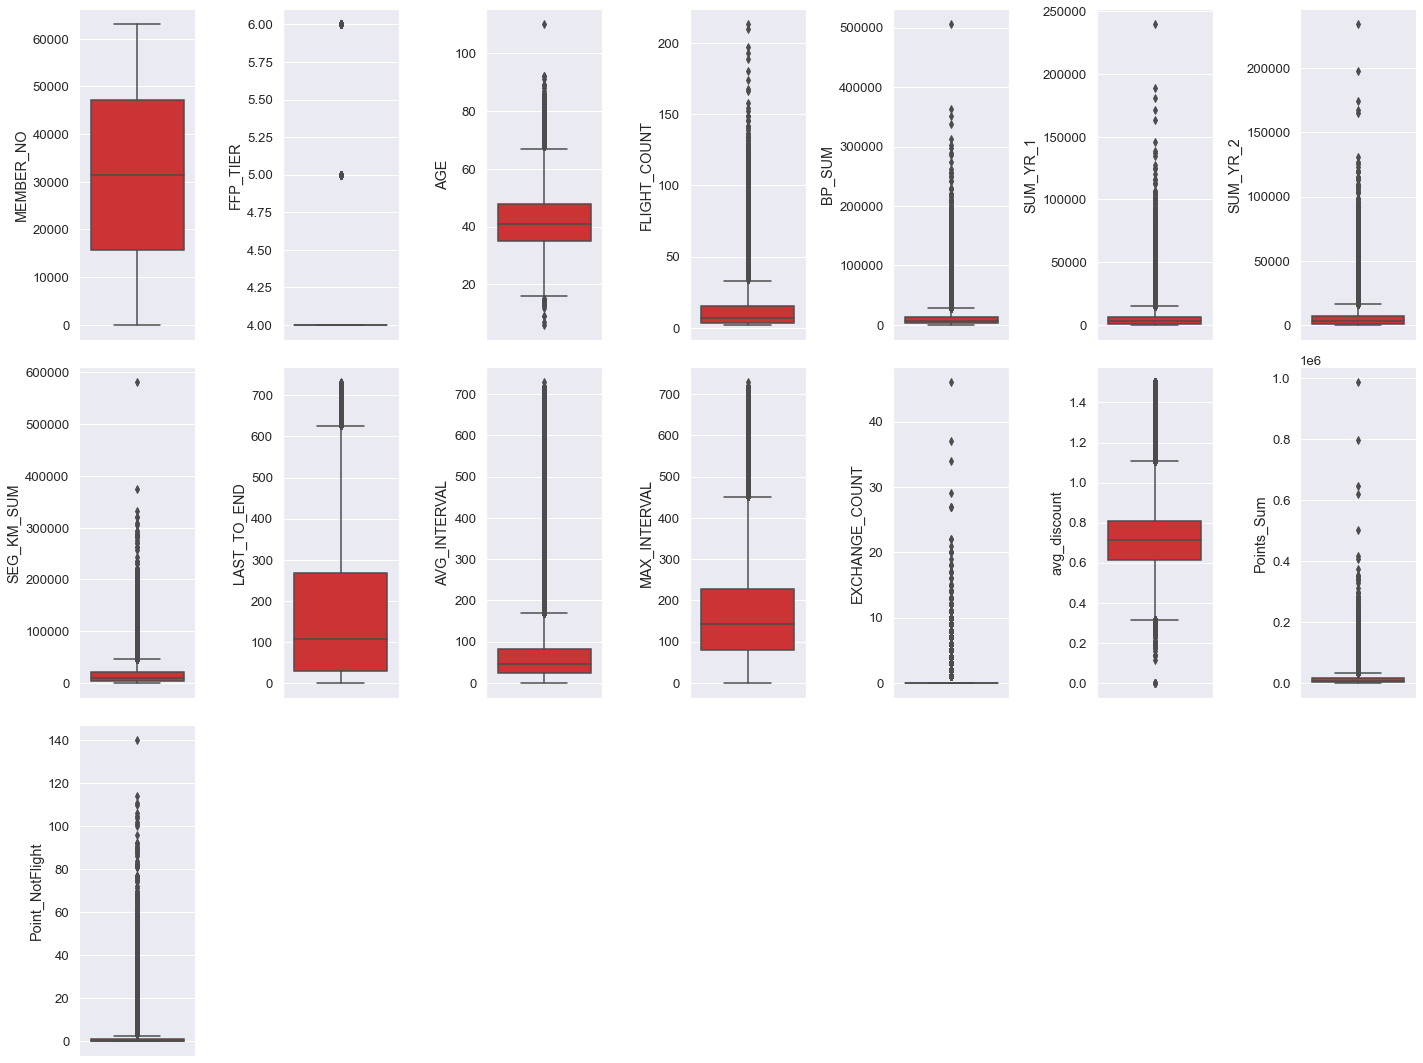

In [23]:
plt.figure(figsize=(20,15))
for i,j in enumerate(num):
        plt.subplot(3,7,i+1)
        sns.boxplot(y=df[j])
        plt.tight_layout()

<AxesSubplot:>

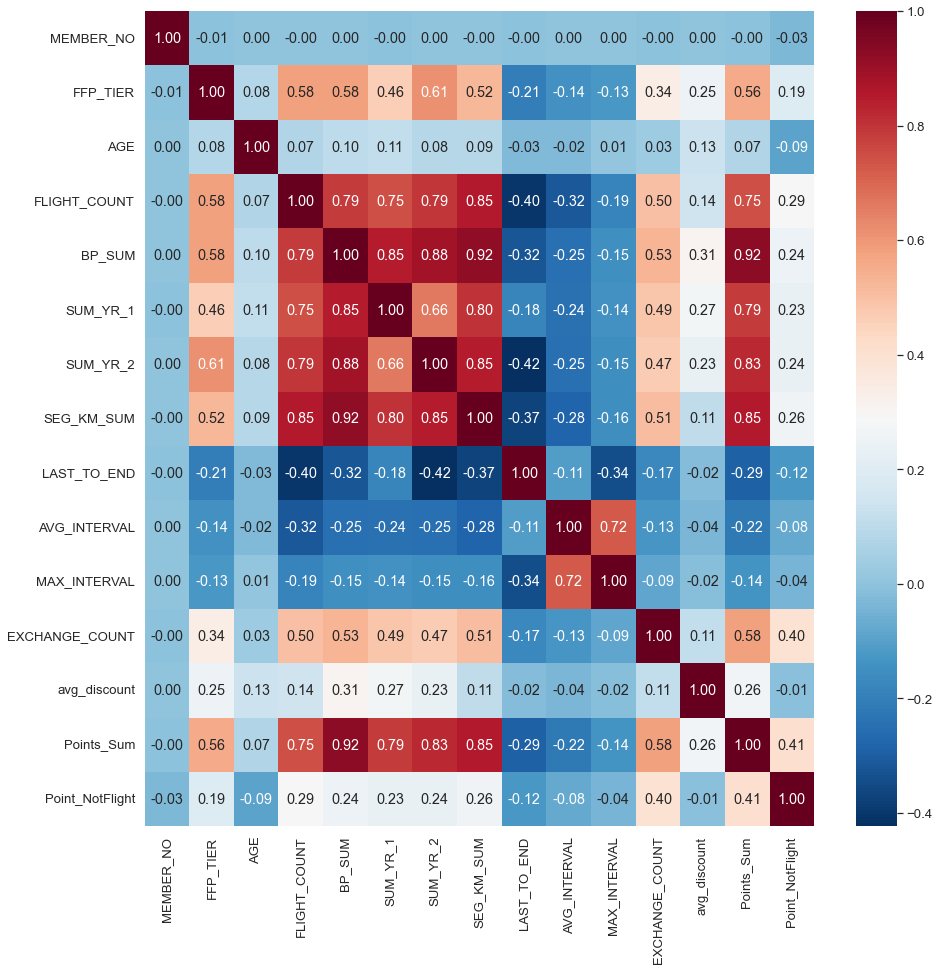

In [24]:

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu_r')

 memilih top 3-6 fitur terbaik

FLIGHT_COUNT : digunakan untuk menentukan customer mana yang paling sering melakukan penerbangan <BR>
LAST_FLIGHT_DATE : digunakan untuk mengetahui kapan terakhir kali customer melakukan penerbangan <BR>
avg_discount : digunakan untuk menentukan berapa rata rata discount yang didapatkan tiap customer